# Sentence Transformer with Multi-Task Learning

This notebook demonstrates the implementation of a sentence transformer model with multi-task learning capabilities using TensorFlow 2.10 with a pretrained BERT model off huggingface/transformers, with using quotes from The Godfather as test data. The version for tensorflow was chosen as I built this demo on my windows PC, which infamously has issues with certain tensorflow versions.

In [1]:
# Imports

import numpy as np
import tensorflow as tf
import pandas as pd
from IPython.display import HTML, display

from sentence_transformer.showcase import (
    showcase_sentence_transformer,
    showcase_multitask_model,
    showcase_training_approaches,
    showcase_transfer_learning,
    showcase_training_loop,
    plot_similarity_matrix,
    plot_embeddings_tsne,
    highlight_entities,
    find_token_positions
)

# Set seed
np.random.seed(1972)
tf.random.set_seed(1972)

## Task 1: Sentence Transformer Implementation

Here, we demonstrate the use of a BERT based transformer with a collection of quotes from The Godfather.

In [2]:
# Sample sentences for demonstration (Godfather quotes)
sample_sentences = [
    "I'll make him an offer he can't refuse.",
    "Keep your friends close, but your enemies closer.",
    "Luca Brasi sleeps with the fishes.",
    "A man who doesn't spend time with his family can never be a real man.",
    "Just when I thought I was out, they pull me back in.",
    "You broke my heart, Fredo. You broke my heart.",
    "In Sicily, women are more dangerous than shotguns."
]

sentence_transformer_results = showcase_sentence_transformer(sample_sentences)

model = sentence_transformer_results["model"]
embeddings = sentence_transformer_results["embeddings"]
similarity_matrix = sentence_transformer_results["similarity_matrix"]

# Model info
print(f"Model architecture: BERT-based sentence transformer")
print(f"Embedding dimension: {embeddings.shape[1]}")
print(f"Pooling strategy: {sentence_transformer_results['model_config'].pooling_strategy}")
print(f"\nSample embedding (first 5 dimensions):")
print(embeddings[0, :5])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model architecture: BERT-based sentence transformer
Embedding dimension: 768
Pooling strategy: cls

Sample embedding (first 5 dimensions):
[ 0.18475749  0.0315791   0.13525183 -0.13982601 -0.08618498]


C:\Users\tungy\AppData\Local\pypoetry\Cache\virtualenvs\multitask-transformer-ih7si_c_-py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tungy\AppData\Local\pypoetry\Cache\virtualenvs\multitask-transformer-ih7si_c_-py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Sentence Similarities

A useful and important function of a sentence transformer is to compute similarities between sentences: here is a plot to show similarity for our quotes.

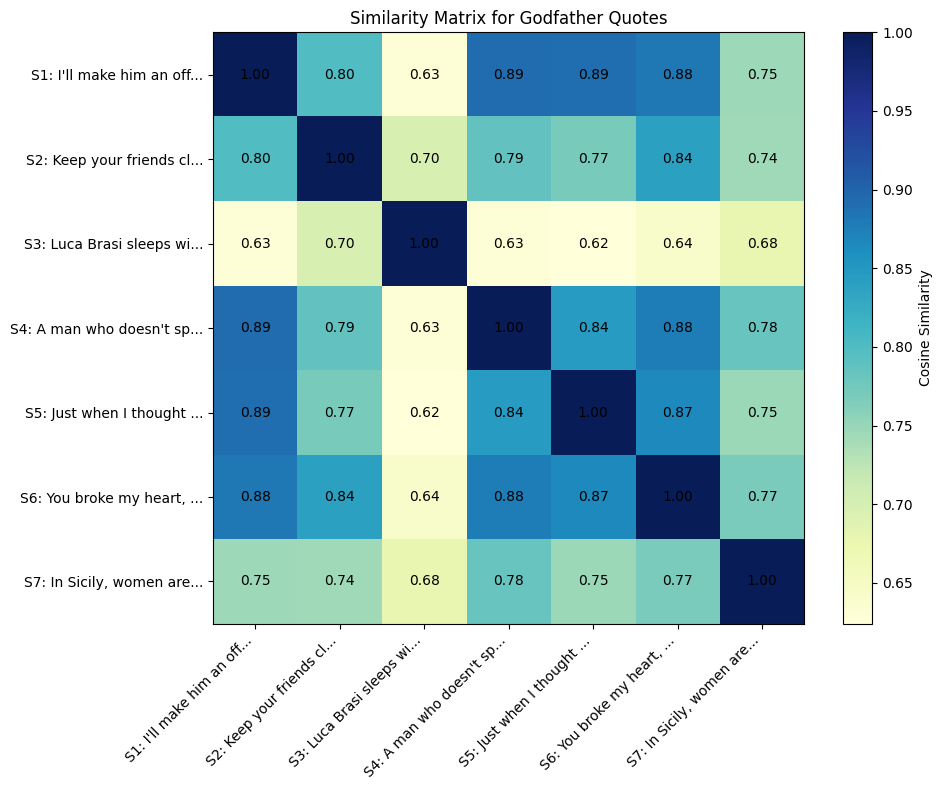

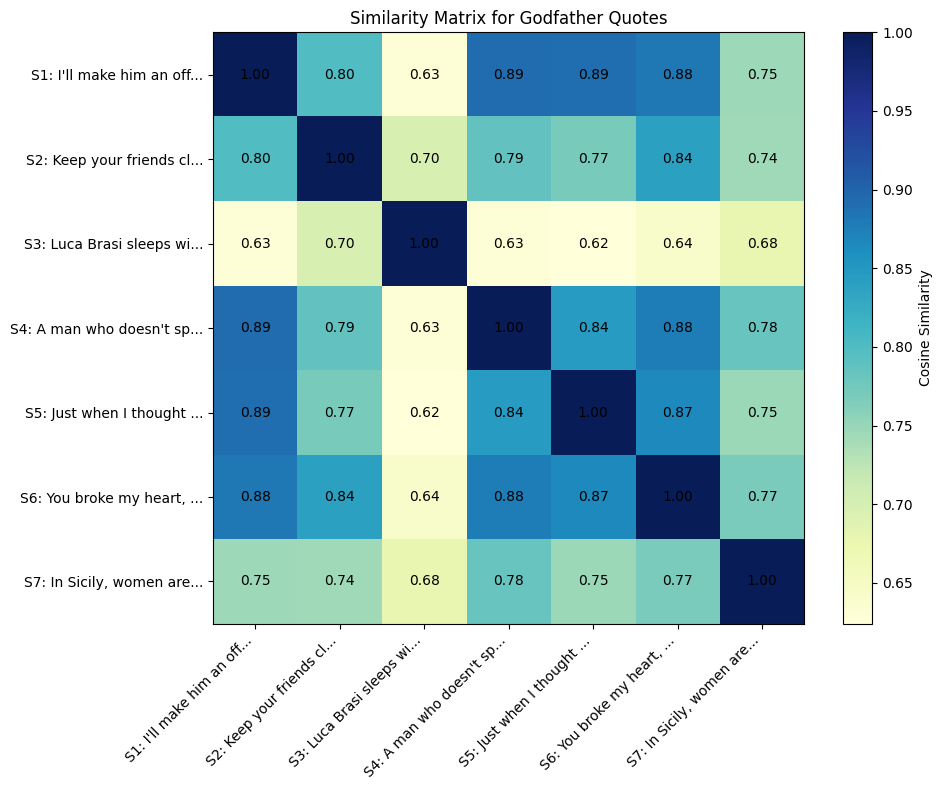

In [3]:
# Visualize the similarity matrix
plot_similarity_matrix(similarity_matrix, sample_sentences, "Similarity Matrix for Godfather Quotes")

### Visualizing with t-SNE

A more intuitive way to visualize the embeddings is with t-SNE.

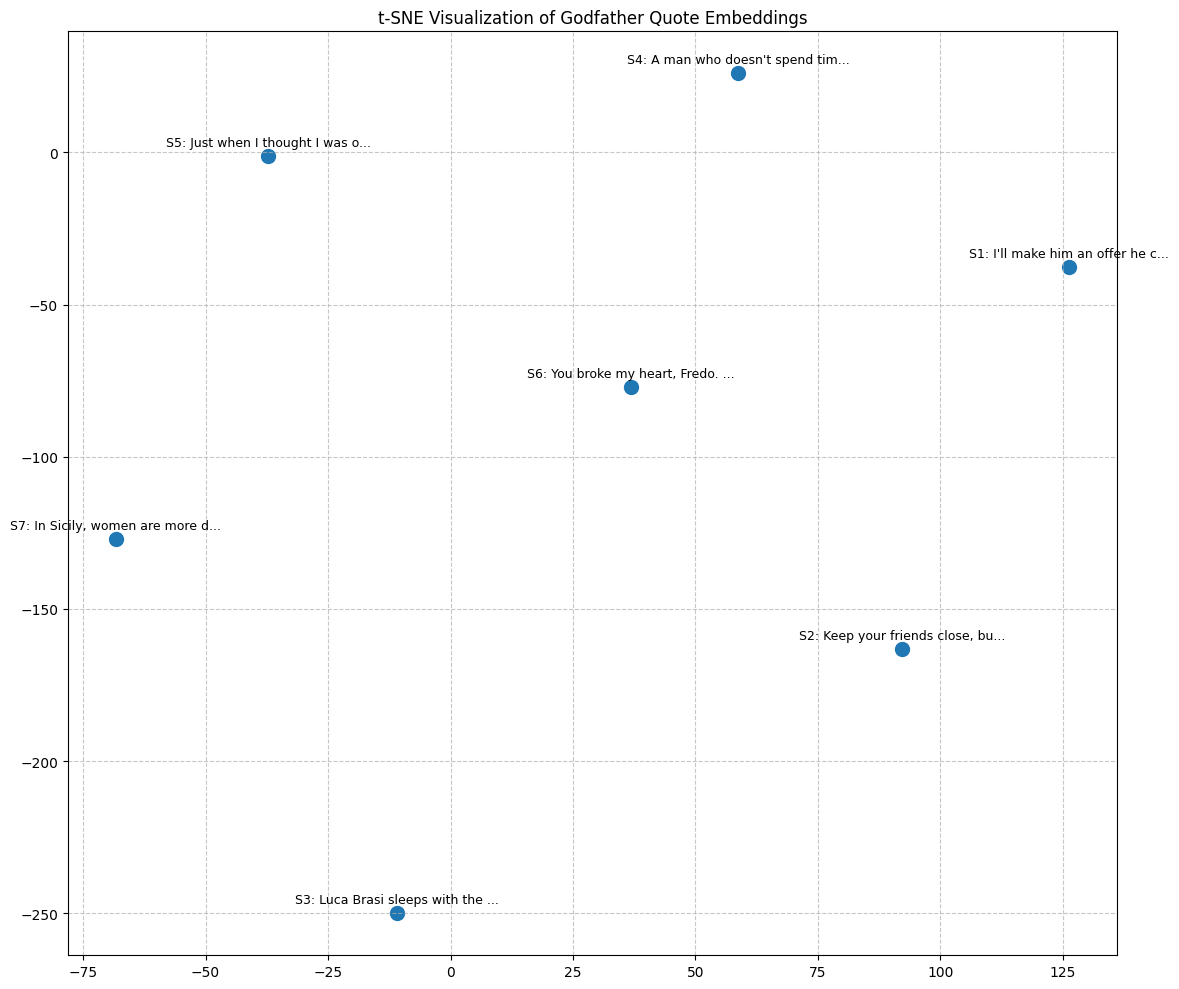

In [4]:
# Visualize the embeddings using t-SNE
if sentence_transformer_results["tsne_data"] is not None:
    plot_embeddings_tsne(sentence_transformer_results["tsne_data"], "t-SNE Visualization of Godfather Quote Embeddings")

### Base Architecture Choices

This implementation uses some standard choices for the transformer backbone:

1. **Pooling Strategy**: We use the CLS token pooling strategy by default (see config.py), which takes the embedding of the special [CLS] token as the sentence representation. Alternative methods that are coded here include mean pooling and max pooling.

2. **Dropout**: Fairly conservative dropout rate of 0.1 to the pooled embeddings to reduce possibilities of overfitting.

3. **Pre-trained BERT**: Pre-trained BERT model from TensorFlow Hub.

4. **Model Interface**: The model returns more than just the sentence embeddings (e.g. sequence embeddings and attention masks) that are useful for further development.

5. **Embedding Normalization**: Embeddings are normalized to have unit length, to make sure the cosine similarity calculation works well.

## Task 2: Multi-Task Learning Expansion

Expand the sentence transformer to handle a multi-task learning setting.
1. Task A: Sentence Classification – Classify sentences into predefined classes (you can make these up). Here I just did sentiment analysis with predefined labels.
2. Task B: [Choose another relevant NLP task such as Named Entity Recognition, Sentiment Analysis, etc.]. Here I just did NER using standard IOB tagging.

In [5]:
# Showcase the multi-task model with Godfather quotes
multitask_results = showcase_multitask_model(sample_sentences)

multitask_model = multitask_results["model"]
multitask_embeddings = multitask_results["embeddings"]
classification_results = multitask_results["classification_results"]
ner_results = multitask_results["ner_results"]

# Model info
print(f"Multi-task Model Architecture: BERT-based with task-specific heads")
print(f"Embedding dimension: {multitask_embeddings.shape[1]}")
print(f"Number of classification classes: {multitask_results['model_config'].classification_classes}")
print(f"Number of NER classes: {multitask_results['model_config'].ner_classes}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Multi-task Model Architecture: BERT-based with task-specific heads
Embedding dimension: 768
Number of classification classes: 3
Number of NER classes: 9


C:\Users\tungy\AppData\Local\pypoetry\Cache\virtualenvs\multitask-transformer-ih7si_c_-py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tungy\AppData\Local\pypoetry\Cache\virtualenvs\multitask-transformer-ih7si_c_-py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Task 2A: Sentence Classification

Basic sentiment classification of the Godfather quotes, where the model predicts whether a quote's sentiment is positive, neutral, or negative.

In [6]:
classification_df = pd.DataFrame(classification_results)
classification_df["confidence"] = classification_df["confidence"].apply(lambda x: f"{x:.2f}%")

display(HTML(classification_df.to_html(index=False)))

sentence,predicted_class,expected_class,confidence
I'll make him an offer he can't refuse.,Positive,Negative,49.76%
"Keep your friends close, but your enemies closer.",Positive,Neutral,45.31%
Luca Brasi sleeps with the fishes.,Positive,Negative,54.08%
A man who doesn't spend time with his family can never be a real man.,Positive,Neutral,44.70%
"Just when I thought I was out, they pull me back in.",Neutral,Negative,39.46%
"You broke my heart, Fredo. You broke my heart.",Positive,Negative,46.66%
"In Sicily, women are more dangerous than shotguns.",Neutral,Neutral,56.85%


### Task 2B: Named Entity Recognition (NER)

Named Entity Recognition (NER), with standard IOB tagging.

In [7]:
import spacy
from spacy import displacy
from IPython.display import display, HTML

# Convert NER results to spaCy format
def visualize_entities(sentence, entities):
    """
    Visualize named entities using spaCy's displaCy.
    
    Args:
        sentence: The text to visualize
        entities: List of (start, end, label) tuples
    """
    # Convert to spaCy's format
    ents = []
    for start, end, label in entities:
        # Convert B-PER to PER
        if '-' in label:
            _, label = label.split('-', 1)
        
        ents.append({
            "start": start,
            "end": end,
            "label": label
        })
    
    # Create the data structure for displaCy
    doc_data = {
        "text": sentence,
        "ents": ents,
        "title": None
    }
    
    # Define entity colors
    colors = {
        "PER": "#ff9999",
        "ORG": "#99ccff",
        "LOC": "#99ff99",
        "MISC": "#ffcc99"
    }
    
    # Display with displaCy
    html = displacy.render([doc_data], style="ent", manual=True, options={"colors": colors})
    return html

for result in ner_results:
    sentence = result["sentence"]
    expected_entities = result["expected_entities"]
    
    print(f"Sentence: {sentence}")
    print("Named Entities:")
    
    entities = []
    for entity_text, entity_type in expected_entities:
        start_idx = sentence.find(entity_text)
        if start_idx >= 0:
            end_idx = start_idx + len(entity_text)
            entities.append((start_idx, end_idx, entity_type))
    
    if entities:
        html = visualize_entities(sentence, entities)
        display(HTML(html))
    else:
        print("No entities detected.")
    
    if expected_entities:
        print("Expected entities:")
        for entity, entity_type in expected_entities:
            print(f"  - {entity} ({entity_type})")
    else:
        print("No expected entities.")
    
    print("\n" + "-"*60)

Sentence: I'll make him an offer he can't refuse.
Named Entities:


No expected entities.

------------------------------------------------------------
Sentence: Keep your friends close, but your enemies closer.
Named Entities:


No expected entities.

------------------------------------------------------------
Sentence: Luca Brasi sleeps with the fishes.
Named Entities:


Expected entities:
  - Luca Brasi (PER)

------------------------------------------------------------
Sentence: A man who doesn't spend time with his family can never be a real man.
Named Entities:


No expected entities.

------------------------------------------------------------
Sentence: Just when I thought I was out, they pull me back in.
Named Entities:


No expected entities.

------------------------------------------------------------
Sentence: You broke my heart, Fredo. You broke my heart.
Named Entities:


Expected entities:
  - Fredo (PER)

------------------------------------------------------------
Sentence: In Sicily, women are more dangerous than shotguns.
Named Entities:


Expected entities:
  - Sicily (LOC)

------------------------------------------------------------


### Visualizing Multi-Task Embeddings

Visualize the embeddings from the multi-task model to compare against the base sentence transformer.

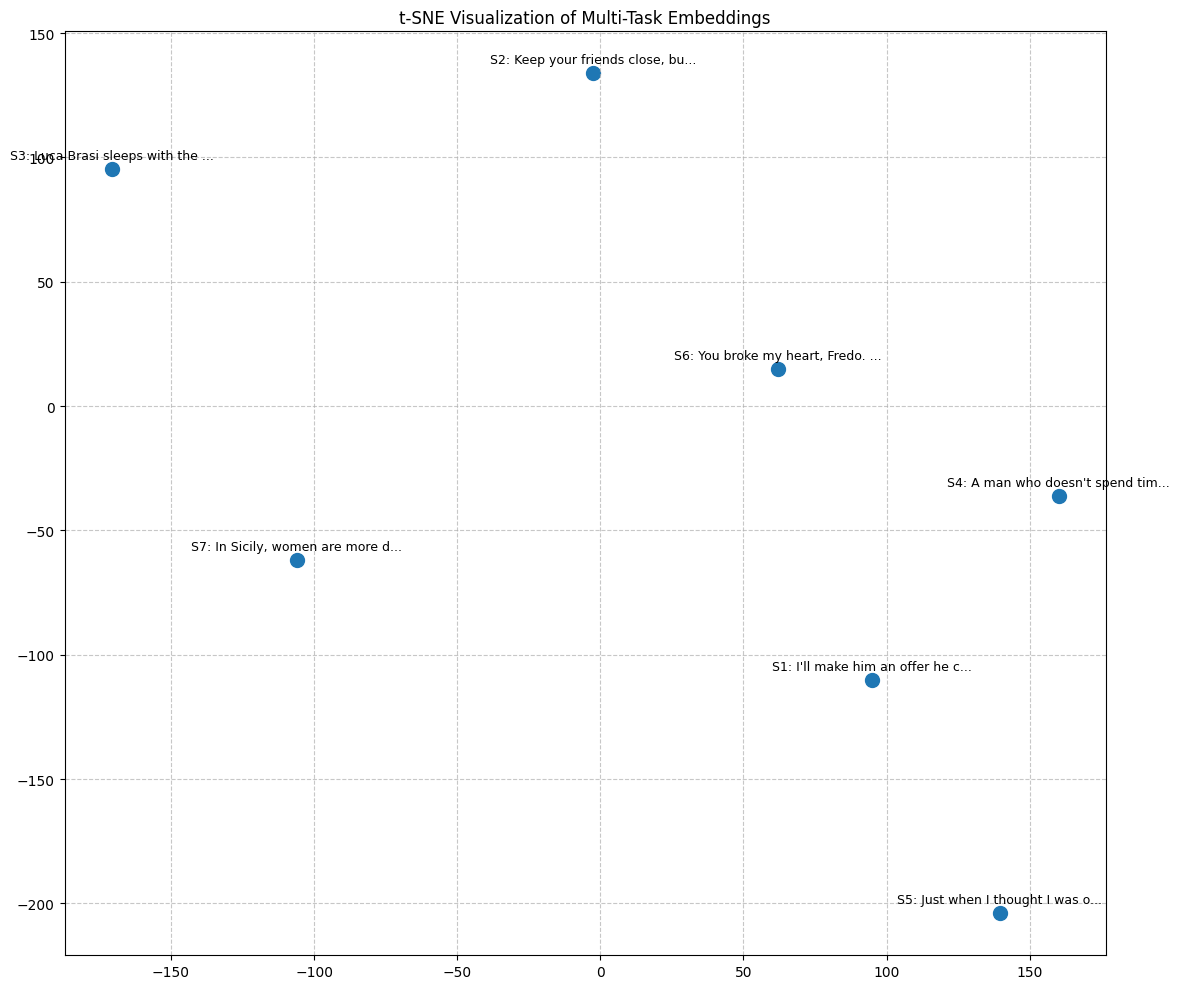

In [8]:
if multitask_results["tsne_data"] is not None:
    plot_embeddings_tsne(multitask_results["tsne_data"], "t-SNE Visualization of Multi-Task Embeddings")

### Architecture Changes for Multi-Task Learning

For multi-task learning, I used the base sentence transformer backbone architecture but with some changes:

1. **Shared Backbone**: Same BERT encoder as the backbone.

2. **Task-Specific Heads**: Different layers for each task:
   - For classification: Dense layers followed by a softmax output layer for sentiment analysis
   - For NER: Token-level classification layers applied to the sequence outputs for entity recognition

3. **Multi-Task Loss Function**: A weighted combination of task-specific losses:
   - Classification loss: Sparse categorical cross-entropy for sentiment analysis
   - NER loss: Token-level sparse categorical cross-entropy with masking for padding
   - Contrastive loss: For improving sentence embeddings quality

4. **Balanced Weighting**: Task weights can be adjusted and tweaked as needed.

5. **Contrastive Learning Integration**: Added contrastive learning to improve the quality of sentence embeddings, helping the model learn better semantic representations.

## Task 3: Training Considerations

Here is a demo on freezing different parts of the network and what it can be used for.

### Option 1: Freeze the Entire Network

In [9]:
# Showcase freezing the entire network
freeze_options = {
    "freeze_entire_network": True,
    "freeze_transformer_only": False,
    "freeze_task_a_head_only": False
}
freeze_results1 = showcase_training_approaches(freeze_options)

# Print parameter statistics for Option 1
print("Option 1: Freeze the entire network")
print(f"Total parameters: {freeze_results1['total_params']:,}")
print(f"Trainable parameters: {freeze_results1['trainable_params']:,} ({freeze_results1['trainable_percentage']:.2f}%)")
print(f"Non-trainable parameters: {freeze_results1['non_trainable_params']:,}")
print("\nImplications:")
print("- No learning occurs; the model uses pre-trained weights as-is")
print("- Only used for inference or as a feature extractor")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Option 1: Freeze the entire network
Total parameters: 109,879,566.0
Trainable parameters: 0.0 (0.00%)
Non-trainable parameters: 109,879,566

Implications:
- No learning occurs; the model uses pre-trained weights as-is
- Only used for inference or as a feature extractor


### Option 2: Freeze Only the Transformer Backbone

In [10]:
# Option 2: Freeze only the transformer backbone
freeze_options = {
    "freeze_entire_network": False,
    "freeze_transformer_only": True,
    "freeze_task_a_head_only": False
}
freeze_results2 = showcase_training_approaches(freeze_options)

# Print parameter statistics for Option 2
print("Option 2: Freeze only the transformer backbone")
print(f"Total parameters: {freeze_results2['total_params']:,}")
print(f"Trainable parameters: {freeze_results2['trainable_params']:,} ({freeze_results2['trainable_percentage']:.2f}%)")
print(f"Non-trainable parameters: {freeze_results2['non_trainable_params']:,}")
print("\nImplications:")
print("- Preserves pre-trained knowledge in the transformer")
print("- Trains only task-specific heads; in our case sentiment analysis and NER")
print("- Significantly reduces catastrophic forgetting, especially with more specialized tasks with smaller domains")
print("- Computationally efficient and requires the least amount of training data")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Option 2: Freeze only the transformer backbone
Total parameters: 109,879,566
Trainable parameters: 397,326 (0.36%)
Non-trainable parameters: 109,482,240

Implications:
- Preserves pre-trained knowledge in the transformer
- Trains only task-specific heads; in our case sentiment analysis and NER
- Significantly reduces catastrophic forgetting, especially with more specialized tasks with smaller domains
- Computationally efficient and requires the least amount of training data


### Option 3: Freeze Only One Task Head

In [11]:
# Option 3: Freeze only one task head (Task A: Classification)
freeze_options = {
    "freeze_entire_network": False,
    "freeze_transformer_only": False,
    "freeze_task_a_head_only": True
}
freeze_results3 = showcase_training_approaches(freeze_options)

# Print parameter statistics for Option 3
print("Option 3: Freeze only Task A (Sentiment Classification) head")
print(f"Total parameters: {freeze_results3['total_params']:,}")
print(f"Trainable parameters: {freeze_results3['trainable_params']:,} ({freeze_results3['trainable_percentage']:.2f}%)")
print(f"Non-trainable parameters: {freeze_results3['non_trainable_params']:,}")
print("\nImplications:")
print("- Useful when one task (in this example, sentiment analysis) is already well-trained and we want to focus on the other (NER)")
print("- Backbone can still adapt to optimize for character and location recognition")
print("- Can lead to catastrophic forgetting for the sentiment classification task")
print("- Suitable for incremental learning scenarios")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Option 3: Freeze only Task A (Sentiment Classification) head
Total parameters: 109,879,566
Trainable parameters: 109,681,417 (99.82%)
Non-trainable parameters: 198,149

Implications:
- Useful when one task (in this example, sentiment analysis) is already well-trained and we want to focus on the other (NER)
- Backbone can still adapt to optimize for character and location recognition
- Can lead to catastrophic forgetting for the sentiment classification task
- Suitable for incremental learning scenarios


### Transfer Learning Approaches

For the multi-task model, a more generic/smoother transfer learning approach is to gradually unfreeze the model starting from the top layers.

In [12]:
# Showcase transfer learning approaches
transfer_learning_results = showcase_transfer_learning()
strategies = transfer_learning_results["strategies"]

# Display transfer learning strategies
for i, strategy in enumerate(strategies):
    print(f"Strategy {i+1}: {strategy['name']}")
    print(f"Pre-trained model: {strategy['pre_trained_model']}")
    print(f"Frozen layers: {strategy['frozen_layers']}")
    print(f"Trainable layers: {strategy['trainable_layers']}")
    print(f"Rationale: {strategy['rationale']}")
    print("\n" + "-"*80 + "\n")

Strategy 1: Freeze all BERT layers
Pre-trained model: BERT base uncased (12-layer, 768-hidden, 12-heads)
Frozen layers: All BERT layers
Trainable layers: Only task-specific heads for classification and NER
Rationale: This approach is useful when you have limited training data or want to avoid catastrophic forgetting of pre-trained knowledge. It's computationally efficient but less adaptable to the target domain.

--------------------------------------------------------------------------------

Strategy 2: Gradual unfreezing of BERT layers
Pre-trained model: BERT base uncased (12-layer, 768-hidden, 12-heads)
Frozen layers: Initially all BERT layers, gradually unfreezing from top to bottom
Trainable layers: Task-specific heads + progressively more BERT layers
Rationale: This approach balances adaptation with preservation of pre-trained knowledge. By unfreezing layers gradually (starting from the top), the model can adapt to the target domain while maintaining lower-level features.

-----

### Gradual Unfreezing

**Implementation steps:**

1. Start with all base BERT layers frozen, leaving only task-specific heads trainable
2. Train the task heads for sentiment analysis and NER for a few epochs
3. Gradually unfreeze BERT layers from top to bottom over subsequent epochs
4. Use low learning rates for deeper layers to preserve low-level linguistic features

**General advantages:**

- Preserves general language understanding from pre-training
- Allows higher layers to adapt to the specific language, characters, and topics
- Particularly effective for a limited dataset size (in this case just 7 quotes)
- Enables balanced learning between sentiment analysis and named entity recognition
- Allows fine tuning of the whole system/stack of layers, while minimizing catastrophic forgetting
- Safe "context switch" from a generic data set such as the one used in BERT, over to a more specialized data set (e.g. movie quotes or reviews)

## Task 4: Training Loop Implementation

Here is the training loop for multi-task learning with Godfather quotes.

In [13]:
# Showcase the training loop with Godfather quotes
training_info = showcase_training_loop(create_synthetic_data=True)

# Model Info
print("Multi-Task Learning Training Loop for Godfather Quotes")
print(f"Optimizer: {training_info['optimizer']}")
print(f"Learning rate: {training_info['learning_rate']}")
print(f"Loss function: {training_info['loss_function']}")
print(f"Metrics: {', '.join(training_info['metrics'])}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Multi-Task Learning Training Loop for Godfather Quotes
Optimizer: Adam (legacy version for TF 2.10)
Learning rate: 2e-05
Loss function: Task-specific losses with weighted combination
Metrics: Classification Accuracy, NER Accuracy


### Training Loop Pseudocode

In [14]:
# Display the training pseudocode
print(training_info['training_pseudocode'])


    # Training loop pseudocode for multi-task learning
    for epoch in range(num_epochs):
        # Reset metrics
        train_loss.reset_states()
        train_classification_loss.reset_states()
        train_ner_loss.reset_states()
        train_classification_accuracy.reset_states()
        train_ner_accuracy.reset_states()
        
        for batch in train_dataset:
            inputs, targets = batch
            
            with tf.GradientTape() as tape:
                outputs = model(inputs, training=True)
                
                losses = task_loss.compute_total_loss(outputs, targets)
                total_loss = losses["total_loss"]
            
            gradients = tape.gradient(total_loss, model.trainable_variables)
            
            gradients, _ = tf.clip_by_global_norm(gradients, max_grad_norm)
            
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
            train_loss.update_state(total_loss)
  

### Sample Batch and Outputs

In [15]:
# Display sample batch and outputs
if 'sample_batch' in training_info and 'sample_outputs' in training_info:
    print("Sample Batch (Godfather Quotes):")
    print(f"Number of quotes: {len(training_info['sample_batch']['inputs'])}")
    print("Example quote: " + training_info['sample_batch']['inputs'][0])
    
    print("\nSample Training Outputs:")
    for loss_name, loss_value in training_info['sample_outputs'].items():
        print(f"{loss_name}: {loss_value:.4f}")

Sample Batch (Godfather Quotes):
Number of quotes: 7
Example quote: I'll make him an offer he can't refuse.

Sample Training Outputs:
total_loss: 3.5942
classification_loss: 1.3564
ner_loss: 2.2378
sentence_embedding_loss: 0.0000


### Training Setup

1. **Handling of Hypothetical Data**

Standardized Input Format: The data pipeline is built to accept a single text input that feeds into all tasks, with task-specific labels organized in a dictionary structure. This allows the model to process the same input text for both sentiment classification and NER.

Task-Specific Targets: For The Godfather quotes, we created:
- Classification labels indicating sentiment (negative, neutral, positive)
- Token-level NER tags marking characters like "Luca Brasi" and "Fredo", and locations like "Sicily"

Contrastive Learning Support: The data handler includes functionality to either:
- Use explicit contrastive labels that indicate which quotes should be considered similar
- Automatically create quote pairs based on their classification labels (i.e. quotes with the same sentiment are treated as similar)

2. **Forward Pass**:

Shared Representation: The BERT encoder processes the input text only once, creating a shared representation that can be used by all downstream tasks. This is computationally efficient and allows knowledge transfer between tasks without having to read and move the data repeatedly.

Task-Specific Heads: The shared representation then splits into different heads:
- The sentence embedding (CLS token) feeds into the classification head
- The token-level sequence outputs feed into the NER head

Weighted Loss Combination: the TaskLoss class handles the use of all 3 losses:
- Calculate individual losses for each task (classification loss, NER loss, contrastive loss)
- Combines them using configurable weights to balance the importance of each task
- Handles masked loss for NER to properly ignore padding tokens

Gradient Management: The training loop uses gradient clipping to prevent any single task from dominating the optimization process, which is important for stable multi-task learning as well as reinforcement learning in general.

3. **Metrics**:

Task-Specific Metrics: Separate metrics for each task to make sure each of the parts aren't overshadowing and deleting learnings from other parts for balanced learning:
- Classification accuracy for sentiment analysis
- Token-level accuracy for NER (with masking to ignore padding)
- Embedding quality through contrastive loss monitoring

Per-Epoch Logging: The training loop logs metrics at each epoch, important for tracking performance changes.

Validation Metrics: Separate validation metrics to monitor overfitting for each task independently, as one task might overfit while another might still be improving. This is one way to inform on decisions of when to freeze different parts of the network/different heads